This notebook plots the data in Figure 2a

In [36]:
# Import plotting tools & formatting. 

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["mathtext.fontset"] ='custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica'
plt.rcParams["font.size"] = "6"
plt.rcParams['axes.linewidth'] = 0.65
plt.rcParams['lines.linewidth'] = 0.65
plt.rcParams['lines.markersize'] = 2.5

# Import the modules needed for data handling

import numpy as np
from numpy import genfromtxt
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d


In [37]:
# Import the raw data, create a list of steps, normalise energy and create a smoothed
# energy average over every 1 ps

energy = (genfromtxt('./data_Kinetics/AIMD_trajectory_concat_E.dat')[:,6])
steps = (np.array(list(range(0,(len(energy))))))*2

smooth = 500
energy_smooth = gaussian_filter1d(energy,smooth)
rel_E = (energy_smooth[0])
energy = [e-rel_E for e in energy]
energy_smooth = [e-rel_E for e in energy_smooth]

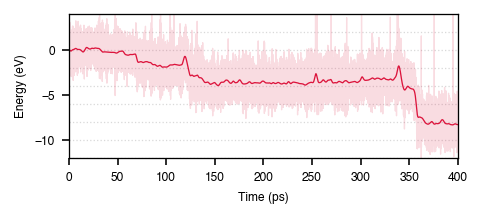

In [38]:
# Plot the data

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(2.7, 1))

a = axes#

x1 = [0,400000]
y_val = np.linspace(-12,2,8)
for y in y_val:
    a.plot(x1,[y,y],':',color= 'black', alpha = 0.15)

a.plot(steps,energy,'-',color= 'crimson', alpha = 0.15)
a.plot(steps,energy_smooth,'-',color= 'crimson', alpha = 1)

a.set_ylim([-12, 4])
a.set_xlim([0, 400000])

a.set_xticks(np.arange(0, 450000, 50000))
a.set_xticklabels(['0','50','100','150','200','250','300','350','400'])

a.set_xlabel('Time (ps)')
a.set_ylabel('Energy (eV)')

a.set_xlim([0, 400000])

fig.subplots_adjust(bottom=0.0, top=1.0, left=0.0, right=1,
                    wspace=0.0, hspace=0.0)

#plt.savefig('AIMD_energy_trajectory_900K_large.png', dpi=300, bbox_inches='tight', format='png')
#plt.savefig('AIMD_energy_trajectory_900K_large.svg', dpi=300, bbox_inches='tight', format='svg')